In [46]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

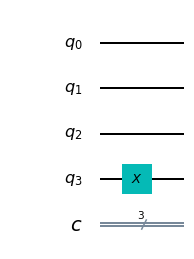

In [15]:
qc = QuantumCircuit(4, 3)
qc.x(3)
qc.draw('mpl')

In [16]:
qc.h(range(3))

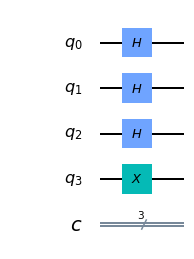

In [4]:
qc.draw('mpl')

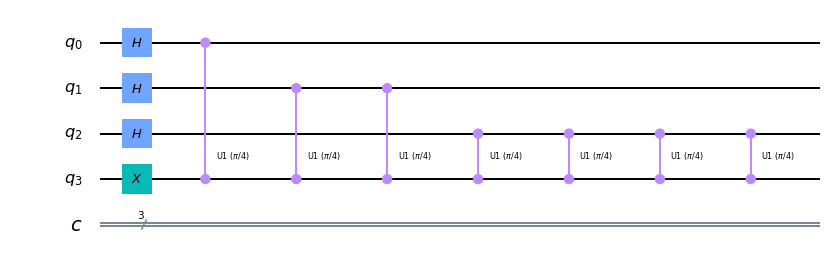

In [17]:
for counting_qubit in range(3):
    for unitary in range(2**counting_qubit):
        qc.cu1(math.pi/4, counting_qubit, 3)
qc.draw('mpl')

In [18]:
def qft_dagger(circ, n):
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

In [19]:
qc.barrier()
qft_dagger(qc, 3)

In [20]:
qc.barrier()
qc.measure(range(3), range(3))

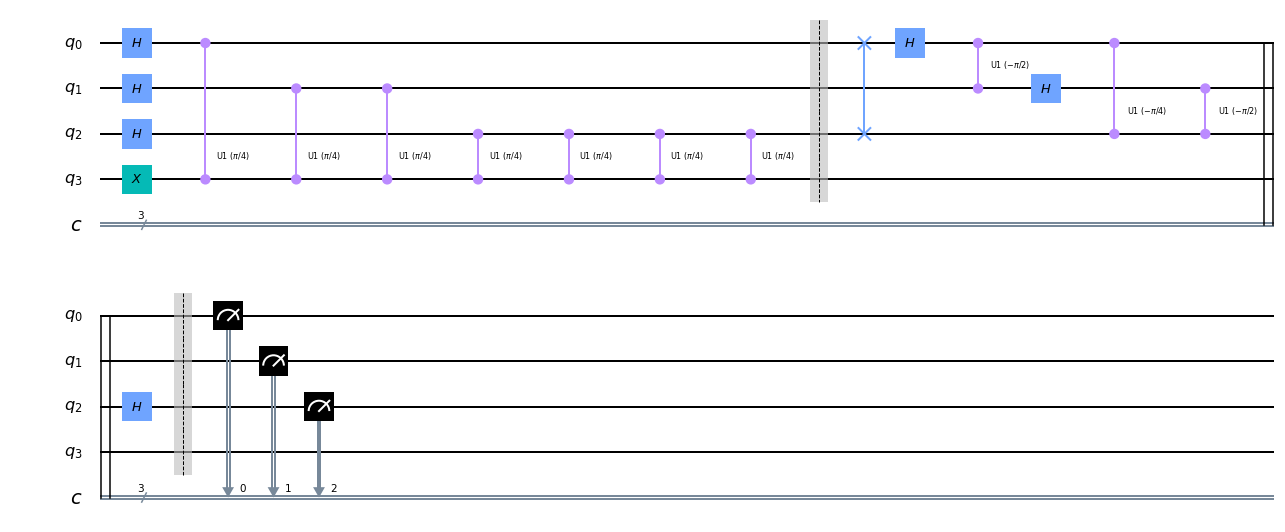

In [21]:
qc.draw('mpl')

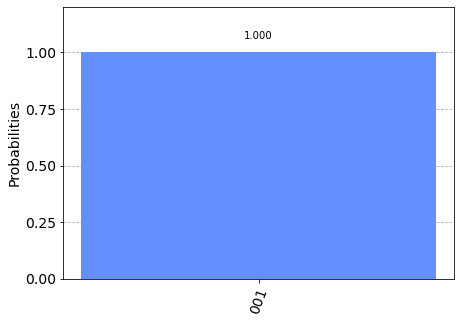

In [22]:
backend = Aer.get_backend('qasm_simulator')
count = execute(qc, backend).result().get_counts()
plot_histogram(count)

In [34]:
def phase_estimation_circuit(n, theta):
    phase_circuit = QuantumCircuit(n, n-1)
    phase_circuit.x(n-1)
    phase_circuit.h(range(n-1))
    
    phase_circuit.barrier()
    for counting_qubit in range(n-1):
        for unitary in range(2**counting_qubit):
            phase_circuit.cu1(theta, counting_qubit, n-1)
    
    phase_circuit.barrier()
    qft_dagger(phase_circuit, n-1)
    
    phase_circuit.barrier()
    phase_circuit.measure(range(n-1), range(n-1))
    
    return phase_circuit

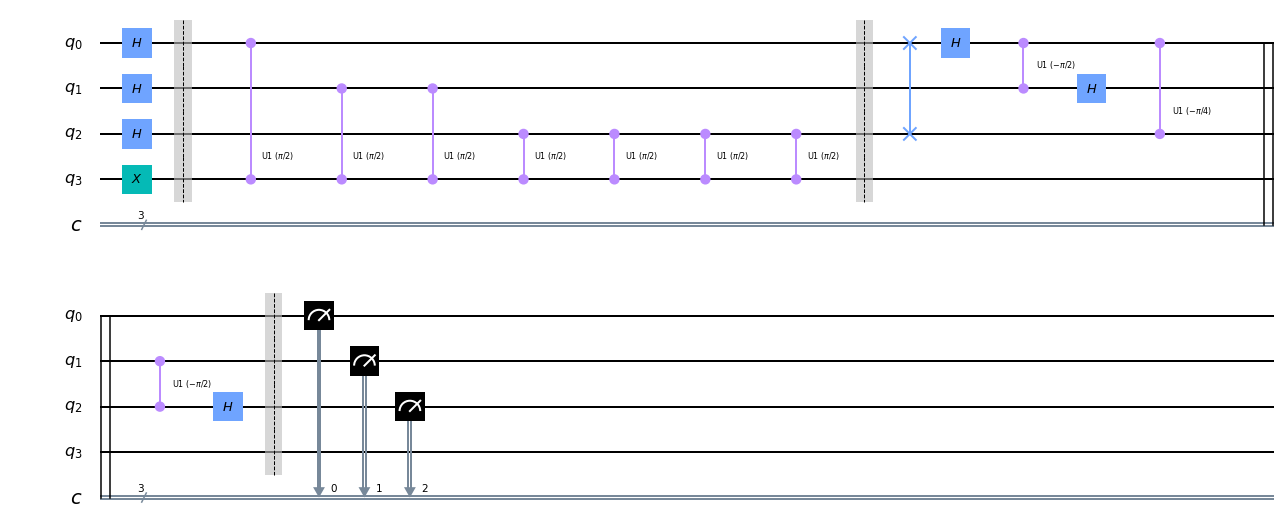

In [39]:
phase_circuit = phase_estimation_circuit(4, 2*math.pi/4)
phase_circuit.draw('mpl')

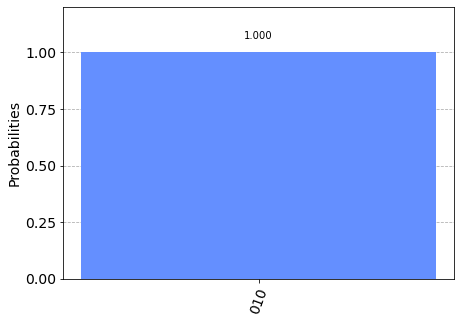

In [40]:
backend = Aer.get_backend('qasm_simulator')
count = execute(phase_circuit, backend).result().get_counts()
plot_histogram(count)

In [41]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [44]:
provider = IBMQ.get_provider(hub='ibm-q')

In [49]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits > 4 and
                    not b.configuration().simulator and b.status().operational == True))

In [51]:
job = execute(phase_circuit, backend, shots=2048)
job_monitor(job)

Job Status: job has successfully run


In [52]:
job_result = job.result()

In [53]:
job_count = job_result.get_counts()

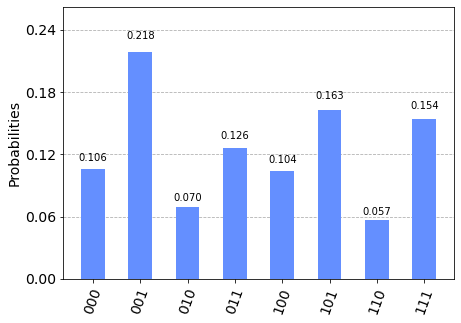

In [54]:
plot_histogram(job_count)

In [55]:
accuracy = round((job_count['001']/2048)*100, 2)
print('The accuracy of {} for the Quantum Phase Estimation Algorithm was {}%'.format(backend, accuracy))

The accuracy of ibmqx2 for the Quantum Phase Estimation Algorithm was 21.83%
